# NAME:Bharathkumar M S

# Flight Fare Prediction (Regression Problem)

## Steps:

1. Importing the dependencies
2. Importing Dataset
3. Data Preprocessing
4. Exploratory Data Analysis(EDA)
5. Handling Categorical Data
6. Test Set
7. Feature Selection
8. Fitting Model Using Random Forest
9. Deployment

### Domain Analysis

1. **Airline:** This column represents the name of the airline company operating the flight.

2. **Date_of_Journey:** This column indicates the date when the journey is scheduled to begin.

3. **Source:** The starting location or city from which the flight originates.

4. **Destination:** The final destination or city where the flight is scheduled to arrive.

5. **Route:** The sequence of connecting cities or airports that the flight will pass through from source to destination.

6. **Dep_Time:** The departure time of the flight from the source airport.

7. **Arrival_Time:** The expected arrival time of the flight at the destination airport.

8. **Duration:** The duration of the flight, indicating the time taken to travel from source to destination.

9. **Total_Stops:** The number of stops or layovers during the journey. It can be a direct flight or have one or more layovers.

10. **Additional_Info:** Any additional information or notes about the flight that might not be covered by other columns. This could include special services, amenities, or instructions.

11. **Price:** The fare or price of the flight ticket. This is the target variable for prediction in your analysis.


# 1.  Importing the dependencies

In [242]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set()

# 2.  Importing Dataset

1. As the data is in the form of excel file(.xlsx extension), we have to use pandas read_excel to load the data.
2. Now we check complete information of data such as hidden values(null values in a row or column).
3. If null values are not present then we move further, and if present we can: 
   a) Impute data using imputation method in sklearn.
   b) Fill NaN values with mean, median or mode using fillna() method.
4. For statistical analysis we use, describe method.

In [243]:
#importing data
df = pd.read_excel(r'C:\Users\bhara\Downloads\flight\Flight-fare-prediction1-main\Data\Data_Train.xlsx')

In [244]:
#getting first 5 rows from dataset
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [245]:
#getting last 5 rows from dataset
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [246]:
df.shape

(10683, 11)

In [247]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [248]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

# 3. Data Checks to perform

- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check Missing values
- Check Duplicates
- Check how many columns are numerical and categoricals
- Check various categories present in the different categorical column

### 3.1 Check data types

In [249]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


### 3.2 Checking the number of unique values of each column

In [250]:
df.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

### 3.3 Check statistics of data set

In [251]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [252]:
df.describe(include='object').T

,count,unique,top,freq
Airline,10683,12,Jet Airways,3849
Date_of_Journey,10683,44,18/05/2019,504
Source,10683,5,Delhi,4537
Destination,10683,6,Cochin,4537
Route,10682,128,DEL → BOM → COK,2376
Dep_Time,10683,222,18:55,233
Arrival_Time,10683,1343,19:00,423
Duration,10683,368,2h 50m,550
Total_Stops,10682,5,1 stop,5625
Additional_Info,10683,10,No info,8345


### 3.4  Check Missing values

In [253]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

### 3.5 Check Duplicates

In [254]:
df.duplicated().sum()

220

### 3.6 Check how many columns are numerical and categoricals

In [255]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 1 numerical features : ['Price']

We have 10 categorical features : ['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Additional_Info']


### 3.7 Check various categories present in the different categorical column

In [256]:
print("Categories in 'Airline' variable:     ",end=" " )
print(df['Airline'].unique())

print("Categories in 'Date_of_Journey' variable:  ",end=" ")
print(df['Date_of_Journey'].unique())

print("Categories in'Source' variable:",end=" " )
print(df['Source'].unique())

print("Categories in 'Destination' variable:     ",end=" " )
print(df['Destination'].unique())


print("Categories in 'Total_Stops' variable:     ",end=" " )
print(df['Total_Stops'].unique())

print("Categories in 'Additional_Info' variable:     ",end=" " )
print(df['Additional_Info'].unique())

Categories in 'Airline' variable:      ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
Categories in 'Date_of_Journey' variable:   ['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019'
 '9/05/2019' '24/04/2019' '3/03/2019' '15/04/2019' '12/06/2019'
 '6/03/2019' '21/03/2019' '3/04/2019' '6/05/2019' '15/05/2019'
 '18/06/2019' '15/06/2019' '6/04/2019' '18/05/2019' '27/06/2019'
 '21/05/2019' '06/03/2019' '3/06/2019' '15/03/2019' '3/05/2019'
 '9/03/2019' '6/06/2019' '24/05/2019' '09/03/2019' '1/04/2019'
 '21/04/2019' '21/06/2019' '27/03/2019' '18/03/2019' '12/04/2019'
 '9/04/2019' '1/03/2019' '03/03/2019' '27/04/2019']
Categories in'Source' variable: ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
Categories in 'Destination' variable:      ['New Delhi' 'Banglore' 'Cochin' 

# Exploratory Data Analysis(EDA)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

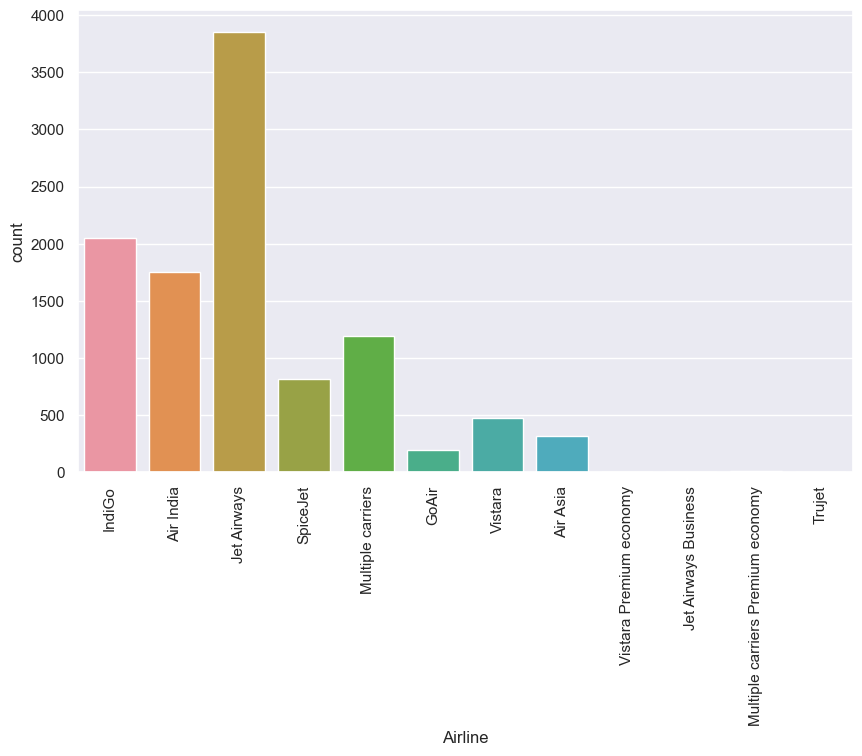

In [257]:
plt.figure(figsize=(10,6))
sns.countplot(x="Airline",data=df)
plt.xticks(rotation=90)


### Insights
- Jet Airways is the costliest among all the flights
- Jet Airways has the highest share followed by Indigo

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Banglore'),
  Text(1, 0, 'Kolkata'),
  Text(2, 0, 'Delhi'),
  Text(3, 0, 'Chennai'),
  Text(4, 0, 'Mumbai')])

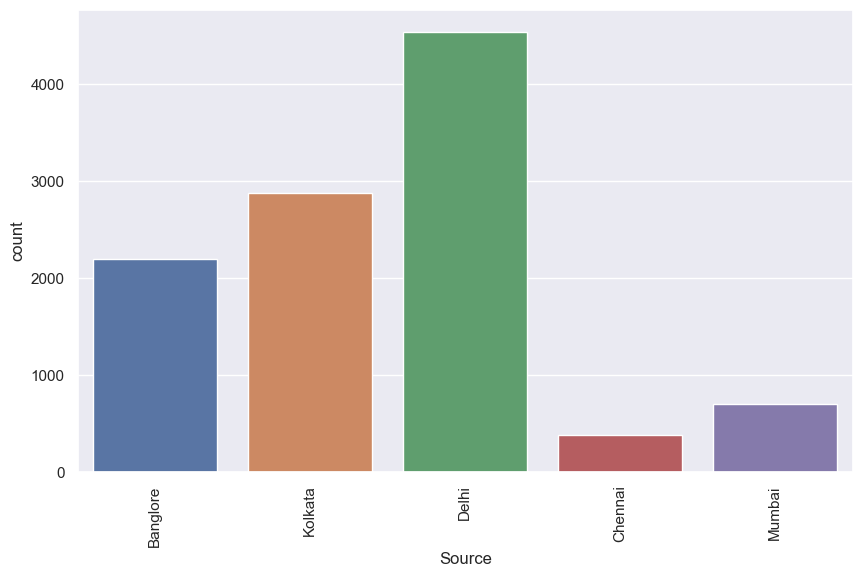

In [258]:
plt.figure(figsize=(10,6))
sns.countplot(x="Source",data=df)
plt.xticks(rotation=90)

### Insights
- Delhi has highest take off or originating point for all the flights followed by Kolkata and Banglore respectively.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'New Delhi'),
  Text(1, 0, 'Banglore'),
  Text(2, 0, 'Cochin'),
  Text(3, 0, 'Kolkata'),
  Text(4, 0, 'Delhi'),
  Text(5, 0, 'Hyderabad')])

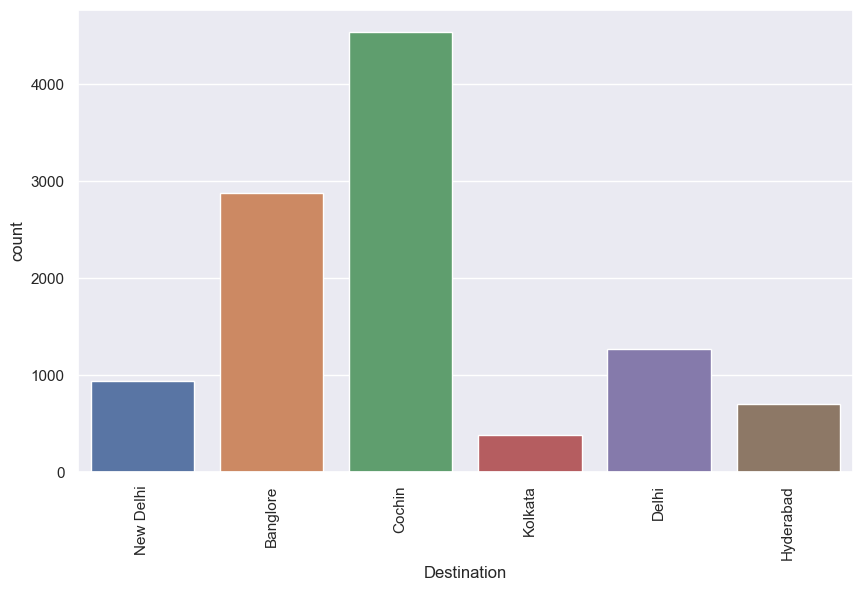

In [259]:
plt.figure(figsize=(10,6))
sns.countplot(x="Destination",data=df)
plt.xticks(rotation=90)

### Insights
- Cochin has the highest landing or arrival of the flights from different places followed by Banglore

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'non-stop'),
  Text(1, 0, '2 stops'),
  Text(2, 0, '1 stop'),
  Text(3, 0, '3 stops'),
  Text(4, 0, '4 stops')])

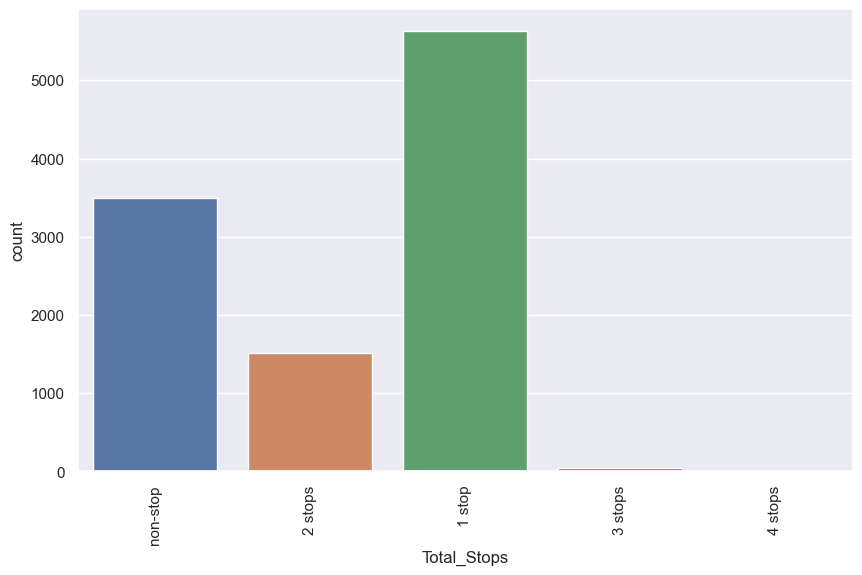

In [260]:
plt.figure(figsize=(10,6))
sns.countplot(x="Total_Stops",data=df)
plt.xticks(rotation=90)


### Insights
-  Most flights have single stop in between taking off and landing at the destination followed by non-stop.


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'No info'),
  Text(1, 0, 'In-flight meal not included'),
  Text(2, 0, 'No check-in baggage included'),
  Text(3, 0, '1 Short layover'),
  Text(4, 0, 'No Info'),
  Text(5, 0, '1 Long layover'),
  Text(6, 0, 'Change airports'),
  Text(7, 0, 'Business class'),
  Text(8, 0, 'Red-eye flight'),
  Text(9, 0, '2 Long layover')])

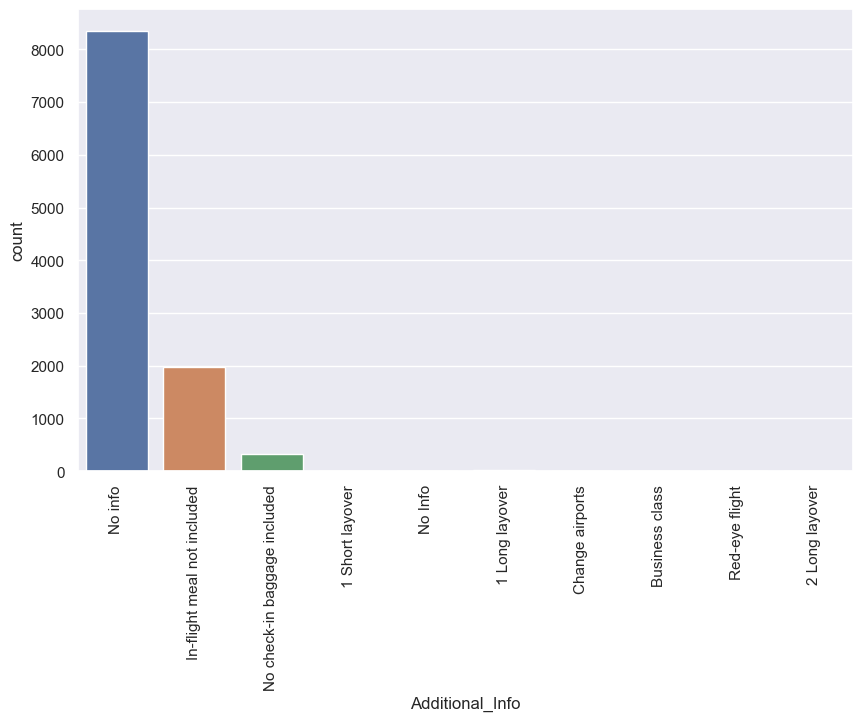

In [261]:
plt.figure(figsize=(10,6))
sns.countplot(x="Additional_Info",data=df)
plt.xticks(rotation=90)


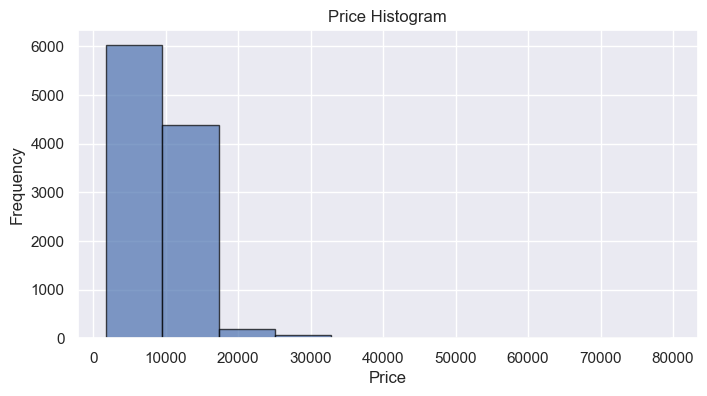

In [262]:
# Extract the 'Price' column
price_data = df['Price']

# Create a histogram plot for the 'Price' feature
plt.figure(figsize=(8, 4))
plt.hist(price_data, bins=10, edgecolor='black', alpha=0.7)
plt.title('Price Histogram')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)

# Show the plot
plt.show()

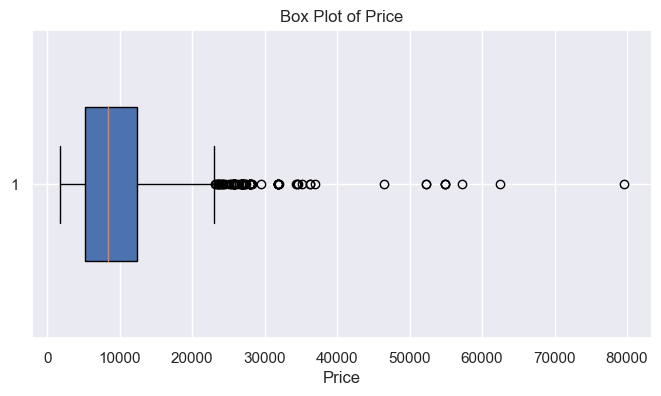

In [263]:
# Extract the 'Price' column
price_data = df['Price']

# Create a box plot for the 'Price' feature
plt.figure(figsize=(8, 4))
plt.boxplot(price_data, vert=False, widths=0.5, patch_artist=True)
plt.title('Box Plot of Price')
plt.xlabel('Price')
plt.grid(True)

# Show the plot
plt.show()

### Insights
- Most of the flights do not have any extra information
- There are few flights with extra information of “in-flight meal not included”


# Bivariate Analysis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

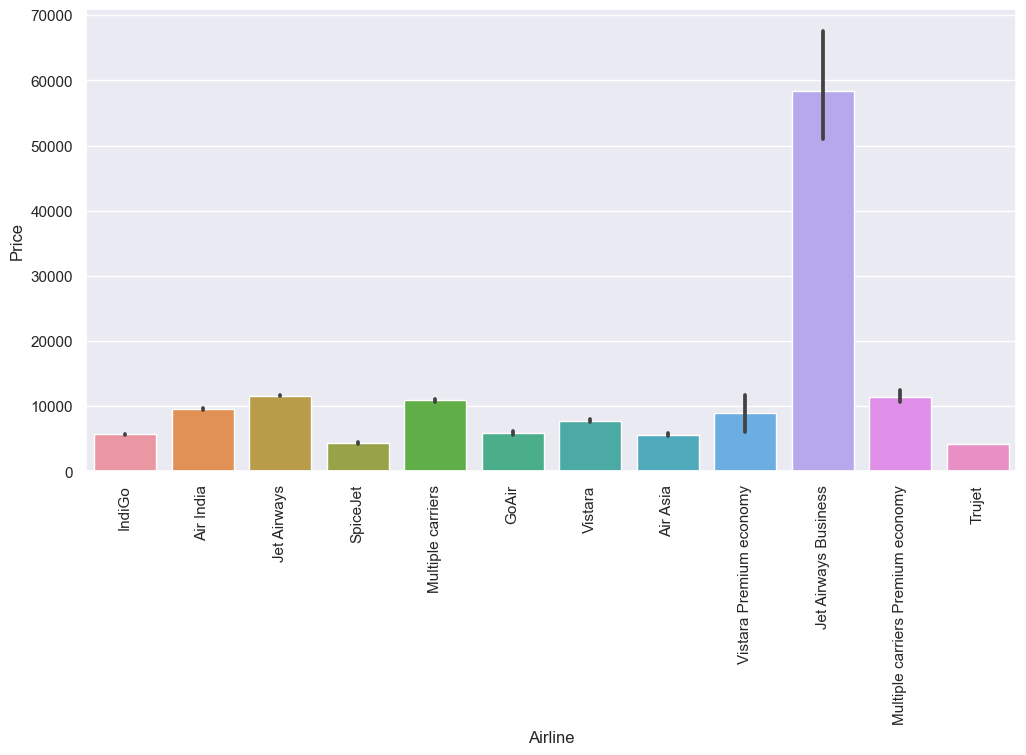

In [264]:
plt.figure(figsize=(12,6))
sns.barplot(x="Airline",y="Price",data=df)
plt.xticks(rotation=90)

### Insights
- Jet Airways Business has the highest price when compared to others.


# Data Preprocessing

### Null Value


In [265]:
#checking number of missing values
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

### Insights
- There are only two null values
- 1 in Route
- 1 in Total_Stops

In [266]:
#Route--> null values=1 and Total_Stops--> null values=1, so we can ignore them
df.dropna(inplace=True)
#now check again
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [267]:
# we have removed row with null values
df.shape

(10682, 11)

### Duplicates

In [268]:
# Checking duplicates
df.duplicated().sum()

220

In [269]:
# droping duplicates
df.drop_duplicates(inplace=True)

In [270]:
df.duplicated().sum()

0

### outliers

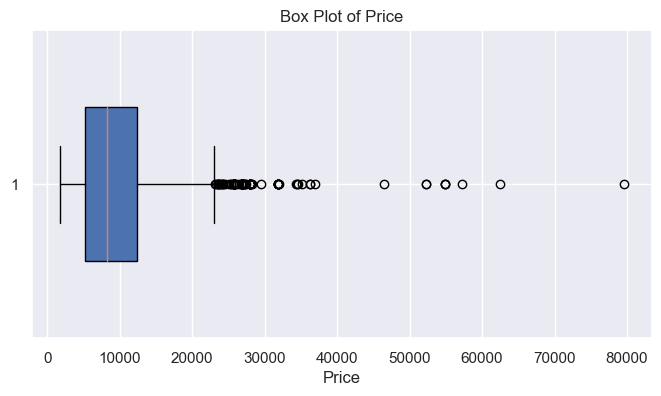

In [271]:
# Extract the 'Price' column
price_data = df['Price']

# Create a box plot for the 'Price' feature
plt.figure(figsize=(8, 4))
plt.boxplot(price_data, vert=False, widths=0.5, patch_artist=True)
plt.title('Box Plot of Price')
plt.xlabel('Price')
plt.grid(True)

# Show the plot
plt.show()

In [272]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)

print("Q1: ",Q1)
print("Q3: ",Q3)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1
print("IQR: ",IQR)

# Define lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("lower_bound: ",lower_bound)
print("upper_bound: ",upper_bound)

Q1:  5224.0
Q3:  12344.75
IQR:  7120.75
lower_bound:  -5457.125
upper_bound:  23025.875


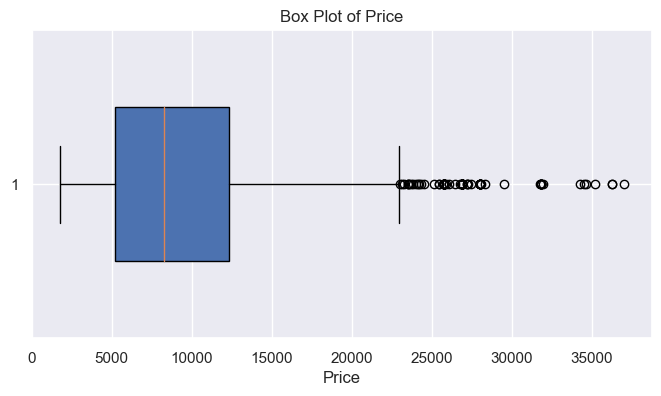

In [273]:
# Create a new DataFrame with outliers removed
df = df[(df['Price'] >= lower_bound) & (df['Price'] <= 40000)]

# Extract the 'Price' column
price_data = df['Price']

# Create a box plot for the 'Price' feature
plt.figure(figsize=(8, 4))
plt.boxplot(price_data, vert=False, widths=0.5, patch_artist=True)
plt.title('Box Plot of Price')
plt.xlabel('Price')
plt.grid(True)

# Show the plot
plt.show()

In [274]:
#checking distribution of categorical data
print(df.Airline.value_counts(),"\n")
print(df.Source.value_counts(),"\n")
print(df.Destination.value_counts(),"\n")
print(df.Total_Stops.value_counts())

Jet Airways                          3697
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64 

Delhi       4343
Kolkata     2860
Banglore    2172
Mumbai       697
Chennai      381
Name: Source, dtype: int64 

Cochin       4343
Banglore     2860
Delhi        1265
New Delhi     907
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64 

1 stop      5618
non-stop    3475
2 stops     1316
3 stops       43
4 stops        1
Name: Total_Stops, dtype: int64



1. From description of data, we can see that 'Date_of_Journey', 'Arrival_Time', 'Dep_Time' is of 'object' datatype, so we have to convert these into 'datetime' datatype so as to use this coloumn property for prediction.
2. For converting into 'datetime' datatype, we use pandas to_datetime

"Date_of_Journey" into datatime:
1. '.dt.day' will extract only 'day', '.dt.month' will extract only 'month' and '.dt.year' will extract only 'year'

In [275]:
#converting to 'datetime'
df['Date_of_Journey'] = pd.to_datetime(df.Date_of_Journey, format='%d/%m/%Y')
#read first five rows
df.head()
#check type of coloumn(Date_of_Journey)
print(df.Date_of_Journey.dtype)

datetime64[ns]


In [276]:
#adding new columns(Journey_day, Journey_month, Journey_year) out of column(Date_of_Journey)

#extracting day
df['Journey_day'] = df['Date_of_Journey'].dt.day
#extracting month
df['Journey_month'] = df['Date_of_Journey'].dt.month
#extracting year
#train_data['Journey_year'] = train_data['Date_of_Journey'].dt.year

#print first 5 rows
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [277]:
#drop column 'Date_of_Journey' as it's of no use now
df.drop(['Date_of_Journey'], axis=1, inplace=True)

#print first 5 rows
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


"Arrival_Time" and "Dep_Time" into datatime:

1.  Arrival time is when the plane pulls up to the gate.
2.  Departure time is when a plane leaves the gate. 
3. '.dt.hour' will extract only 'hour', '.dt.minute' will extract only 'minute' and '.dt.second' will extract only 'second'

In [278]:
#converting 'Arrival_Time' to 'datetime'
df['Arrival_Time'] = pd.to_datetime(df.Arrival_Time)
#read first five rows
df.head()
#check type of coloumn(Arrival_Time)
print(df.Arrival_Time.dtype)

datetime64[ns]


In [279]:
#adding new columns(Arrival_hour, Arrival_minute)

#extracting Arrival hour
df['Arrival_hour'] = df['Arrival_Time'].dt.hour
#extracting Arrival minute
df['Arrival_minute'] = df['Arrival_Time'].dt.minute

#print first 5 rows
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,2023-10-09 13:15:00,7h 25m,2 stops,No info,7662,1,5,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,2023-06-10 04:25:00,19h,2 stops,No info,13882,9,6,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,2023-10-09 23:30:00,5h 25m,1 stop,No info,6218,12,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,2023-10-09 21:35:00,4h 45m,1 stop,No info,13302,1,3,21,35


In [280]:
#drop column 'Arrival_Time' as it's of no use now
df.drop(['Arrival_Time'], axis=1, inplace=True)

#print first 5 rows
df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,9,6,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218,12,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302,1,3,21,35


In [281]:
#converting 'Dep_Time' to 'datetime'
df['Dep_Time'] = pd.to_datetime(df.Dep_Time)
#read first five rows
df.head()
#check type of coloumn(Arrival_Time)
print(df.Dep_Time.dtype)

datetime64[ns]


In [282]:
#adding new columns(Dep_hour, Dep_minute)

#extracting Depature hour
df['Dep_hour'] = df['Dep_Time'].dt.hour
#extracting Departure minute
df['Dep_minute'] = df['Dep_Time'].dt.minute

#print first 5 rows
df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-10-09 22:20:00,2h 50m,non-stop,No info,3897,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-10-09 05:50:00,7h 25m,2 stops,No info,7662,1,5,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2023-10-09 09:25:00,19h,2 stops,No info,13882,9,6,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2023-10-09 18:05:00,5h 25m,1 stop,No info,6218,12,5,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2023-10-09 16:50:00,4h 45m,1 stop,No info,13302,1,3,21,35,16,50


In [283]:
#drop column 'Dep_Time' as it's of no use now
df.drop(['Dep_Time'], axis=1, inplace=True)

#print first 5 rows
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,21,35,16,50


In [284]:
#******************************************************

# 'Duration'--> Time taken by plane to reach destination.
# It is the differnce between Departure time and Arrival time


# Assigning and converting Duration column into list to extract values one-by-one in for-loop
duration = list(df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute #why strip is used here?
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [285]:
#adding columns 'Duration_hours' and 'Duration_minutes' into dataset 'train_data'
df['Duration_hours'] = duration_hours
df['Duration_minutes'] = duration_mins

#get first 5 rows
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,21,35,16,50,4,45


In [286]:
#drop column 'Duration' as it's of no use now
df.drop(['Duration'], axis=1, inplace=True)

#get first 5 rows 
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,21,35,16,50,4,45


# Handling Categorical Data

There are many ways to handle Categorical Data, some of them are:
1. 'LabelEncoder'--> for handling Ordinal Data (means, data which is in order)
1. 'OneHotEncoder'--> for handling Nominal Data (means, data which is not in order)

In [287]:
#checking distribution of categorical data(Airline)
print(df.Airline.value_counts(),"\n")

Jet Airways                          3697
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64 



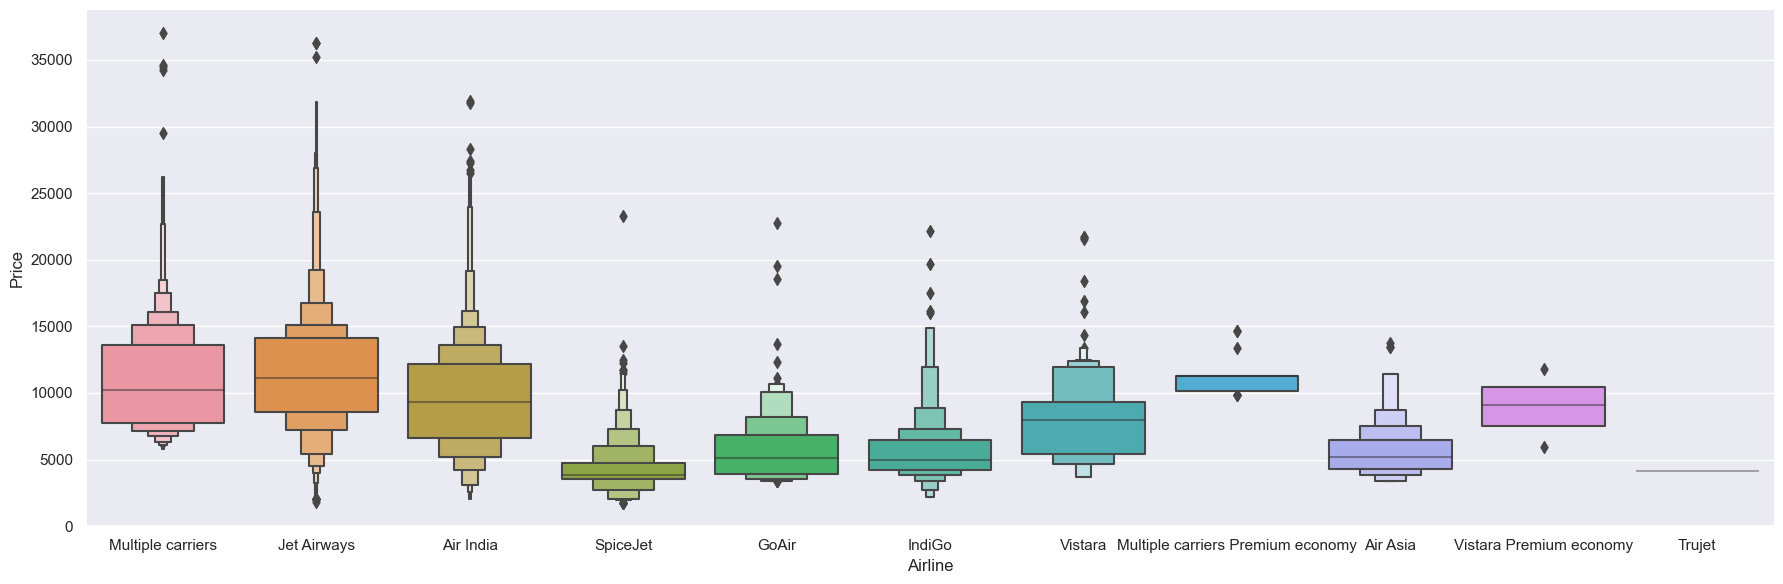

In [288]:
#Graph of Airline vs Price
sns.catplot(y='Price', x='Airline', data=df.sort_values('Price', ascending=False), kind='boxen', height=6, aspect=3)
plt.show()

# From graph we can see that 'Jet Airways Business' have the highest Price.
# Apart from the first Airline almost all are having similar 'median'.


In [289]:
#As Airline--> Nominal Categorical Data, so we perform 'OneHotEncoding'

#make a dataframe named 'Airline'
Airline = df[['Airline']]
Airline = pd.get_dummies(Airline, drop_first=True)
#get first 5 rows of Airline
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0


In [290]:
#checking distribution of categorical data(Source)
print(df.Source.value_counts(),"\n")

Delhi       4343
Kolkata     2860
Banglore    2172
Mumbai       697
Chennai      381
Name: Source, dtype: int64 



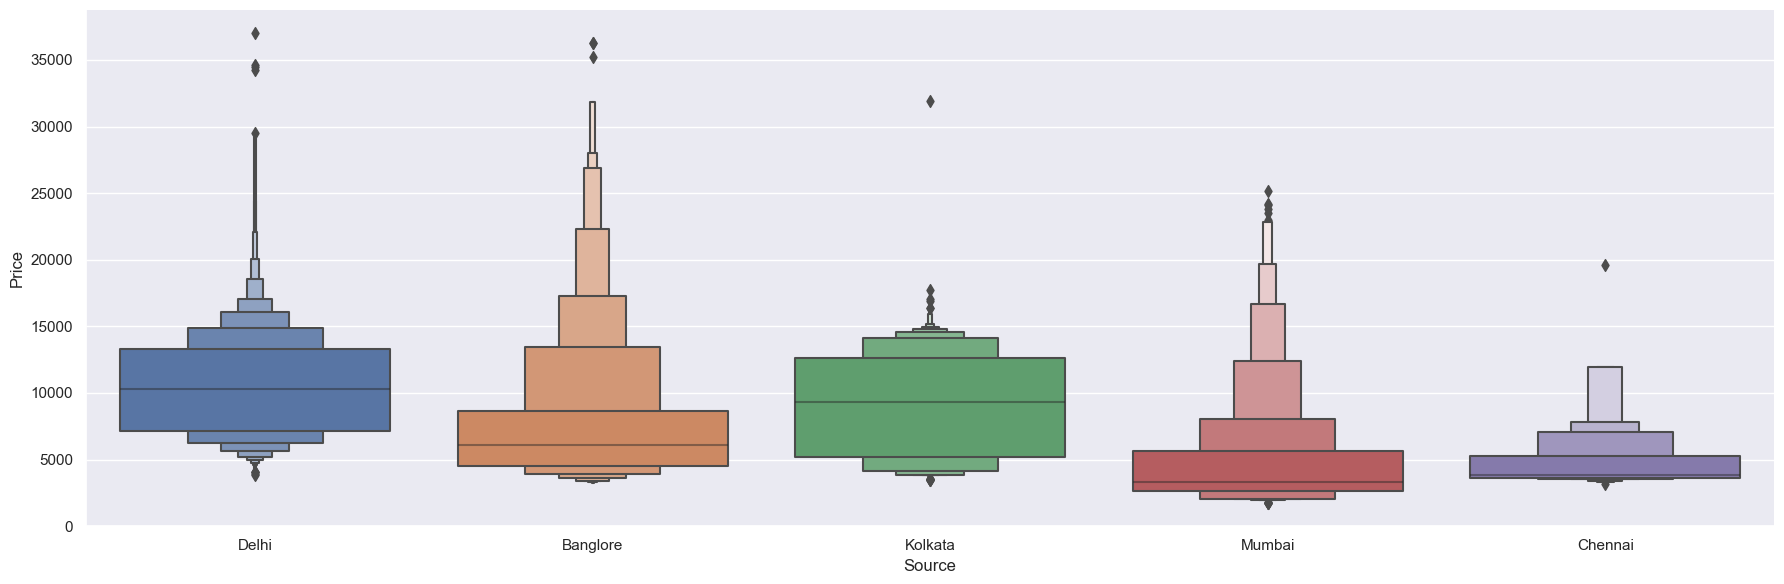

In [291]:
#Graph of Source vs Price
sns.catplot(y='Price', x='Source', data=df.sort_values('Price', ascending=False), kind='boxen', height=6, aspect=3)
plt.show()

In [292]:
#As Source--> Nominal Categorical Data, so we perform 'OneHotEncoding'

#make a dataframe named 'Source'
Source = df[['Source']]
Source = pd.get_dummies(Source, drop_first=True)
#get first 5 rows of Source
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [293]:
#checking distribution of categorical data(Destination)
print(df.Destination.value_counts(),"\n")

Cochin       4343
Banglore     2860
Delhi        1265
New Delhi     907
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64 



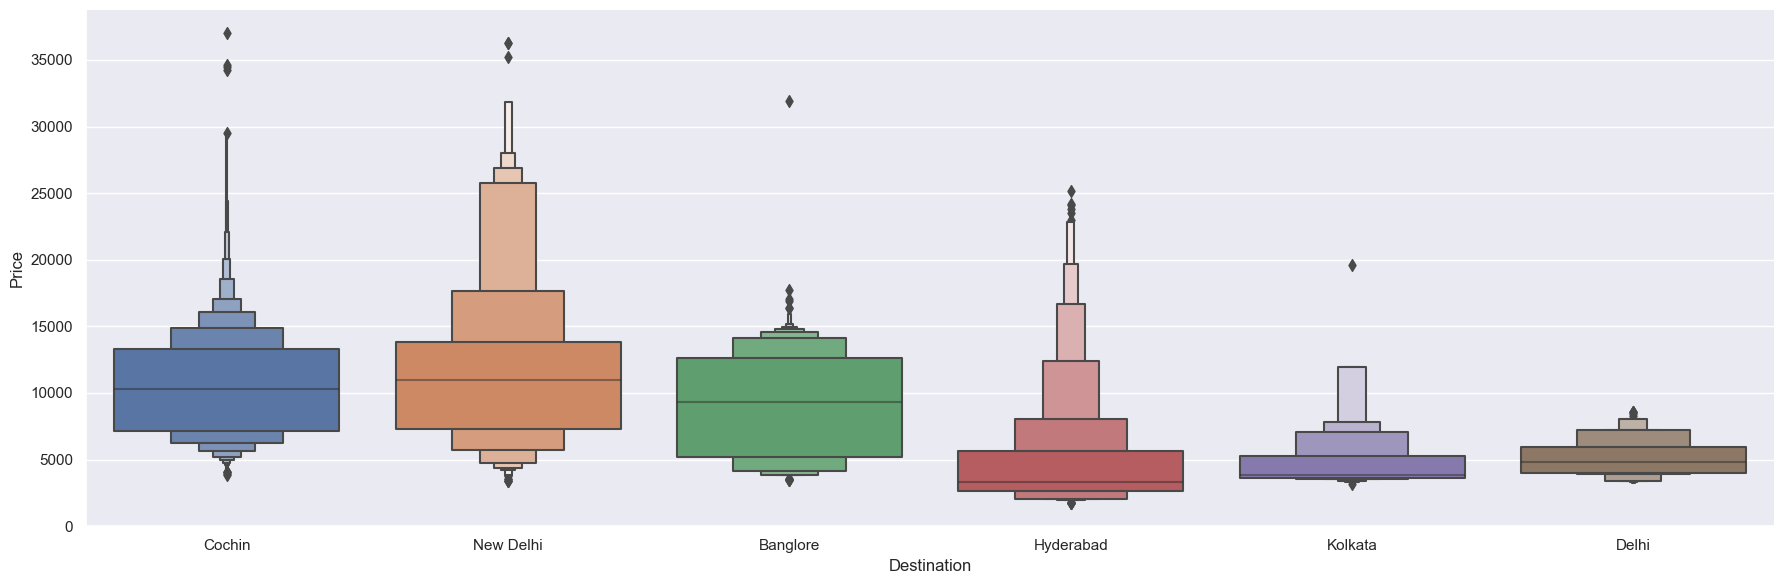

In [294]:
#Graph of Destination vs Price
sns.catplot(y='Price', x='Destination', data=df.sort_values('Price', ascending=False), kind='boxen', height=6, aspect=3)
plt.show()

In [295]:
#As Destination--> Nominal Categorical Data, so we perform 'OneHotEncoding'

#***********************why not banglore

#make a dataframe named 'Destination'
Destination = df[['Destination']]
Destination = pd.get_dummies(Destination, drop_first=True)
#get first 5 rows of Destination
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [296]:
#checking distribution of categorical data(Route)
df['Route'].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1536
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

In [297]:
#as 'Total_Stops' and 'Route' are related(dependent on) to each other, so we can drop 'Route'.
df.drop(['Route'], axis=1, inplace=True)

#get first 5 rows
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,21,35,16,50,4,45


In [298]:
#checking distribution of categorical data(Total_Stops)
print(df.Total_Stops.value_counts(),"\n")

1 stop      5618
non-stop    3475
2 stops     1316
3 stops       43
4 stops        1
Name: Total_Stops, dtype: int64 



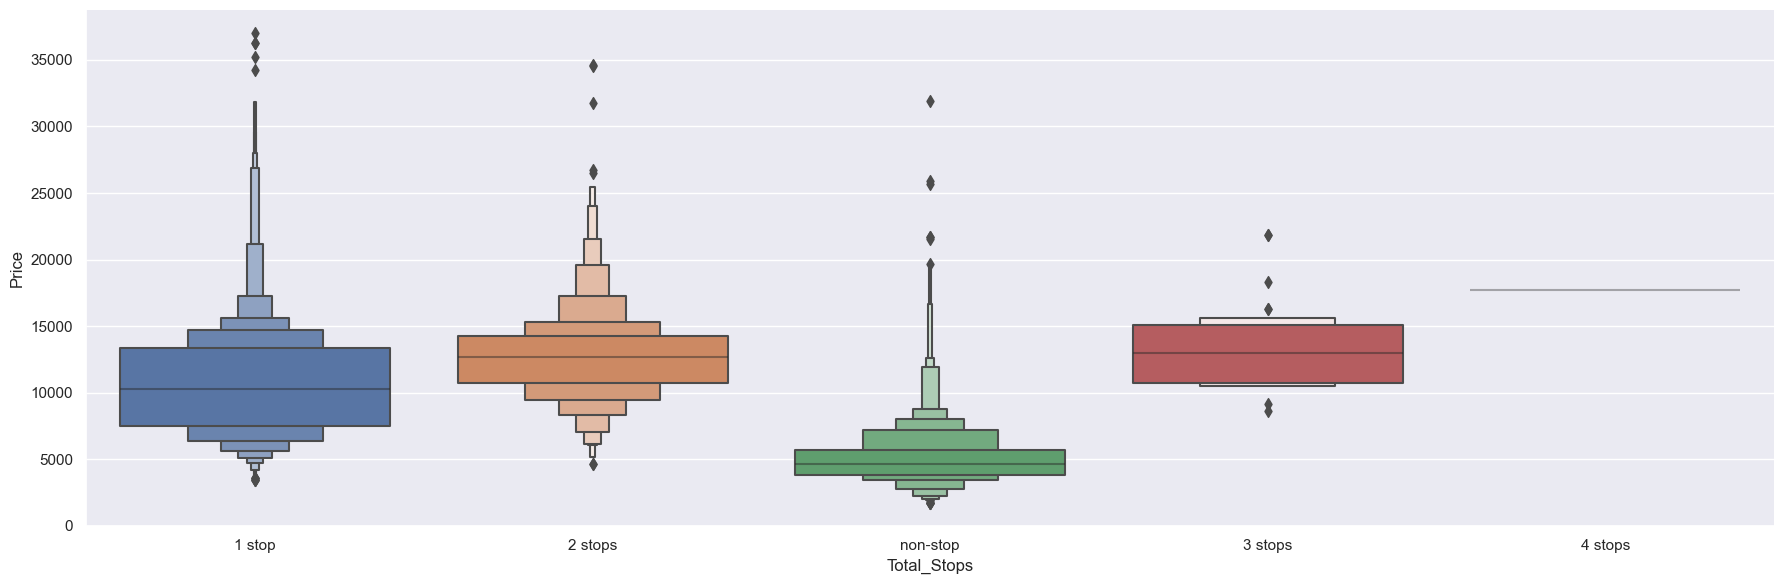

In [299]:
#Graph of Total_Stops vs Price
sns.catplot(y='Price', x='Total_Stops', data=df.sort_values('Price', ascending=False), kind='boxen', height=6, aspect=3)
plt.show()

In [300]:
#As Total_Stops --> Ordinal Categorical Data, so we perform 'LabelEncoding'
#we assign values in 'Total_Stops' with corresponding keys.

df.replace({'Total_Stops':{'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}},inplace=True)
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,1,No info,13302,1,3,21,35,16,50,4,45


In [301]:
#checking distribution of categorical data(Additional_Info)
print(df.Additional_Info.value_counts(),"\n")

#as 80% of information in 'Additional_Info' is 'No info', hence we can drop this column
df.drop(['Additional_Info'], axis=1, inplace=True)

#get first 5 rows
df.head()

No info                         8176
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
No Info                            3
1 Short layover                    1
Business class                     1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64 



,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,0,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,21,35,16,50,4,45


In [302]:
train_data=df

In [303]:
#conactenate dataframe--> (train_data, Airline, Source, Destination)
train_data1 = pd.concat([df, Airline, Source, Destination], axis=1)

#print first 5 rows
train_data1.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Arrival_hour,Arrival_minute,Dep_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,1,10,22,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,13,15,5,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,4,25,9,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,23,30,18,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,21,35,16,...,0,0,0,0,0,0,0,0,0,1


In [304]:
#drop columns 'Airline, Source, Destination' as these are now of no further use
train_data1.drop(['Airline', 'Source', 'Destination'], axis=1, inplace=True)
#print first 5 rows
train_data1.head()

,Total_Stops,Price,Journey_day,Journey_month,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Duration_hours,Duration_minutes,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,1,10,22,20,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,13,15,5,50,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,4,25,9,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,23,30,18,5,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,21,35,16,50,4,45,...,0,0,0,0,0,0,0,0,0,1


In [305]:
#shape of dataframe 'train_data'
train_data1.shape

(10453, 29)

# Feature Selection

We find out best features which will contribute and have good relations with target variable. Some methods for selection are following:
1. heatmap
2. feature_importances_
3. SelectKBest

In [306]:
#number of rows and columns in 'train_data'.
train_data1.shape

(10453, 29)

In [307]:
#name of all the columns of 'train_data'
train_data1.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Arrival_hour',
       'Arrival_minute', 'Dep_hour', 'Dep_minute', 'Duration_hours',
       'Duration_minutes', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [308]:
#divide 'tarin_data' into 'X=independent feature(columns)' and 'Y=dependent/target feature'
X = train_data1.drop(['Price'], axis=1)
Y = train_data1['Price']

#print X and Y
X.head()
Y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

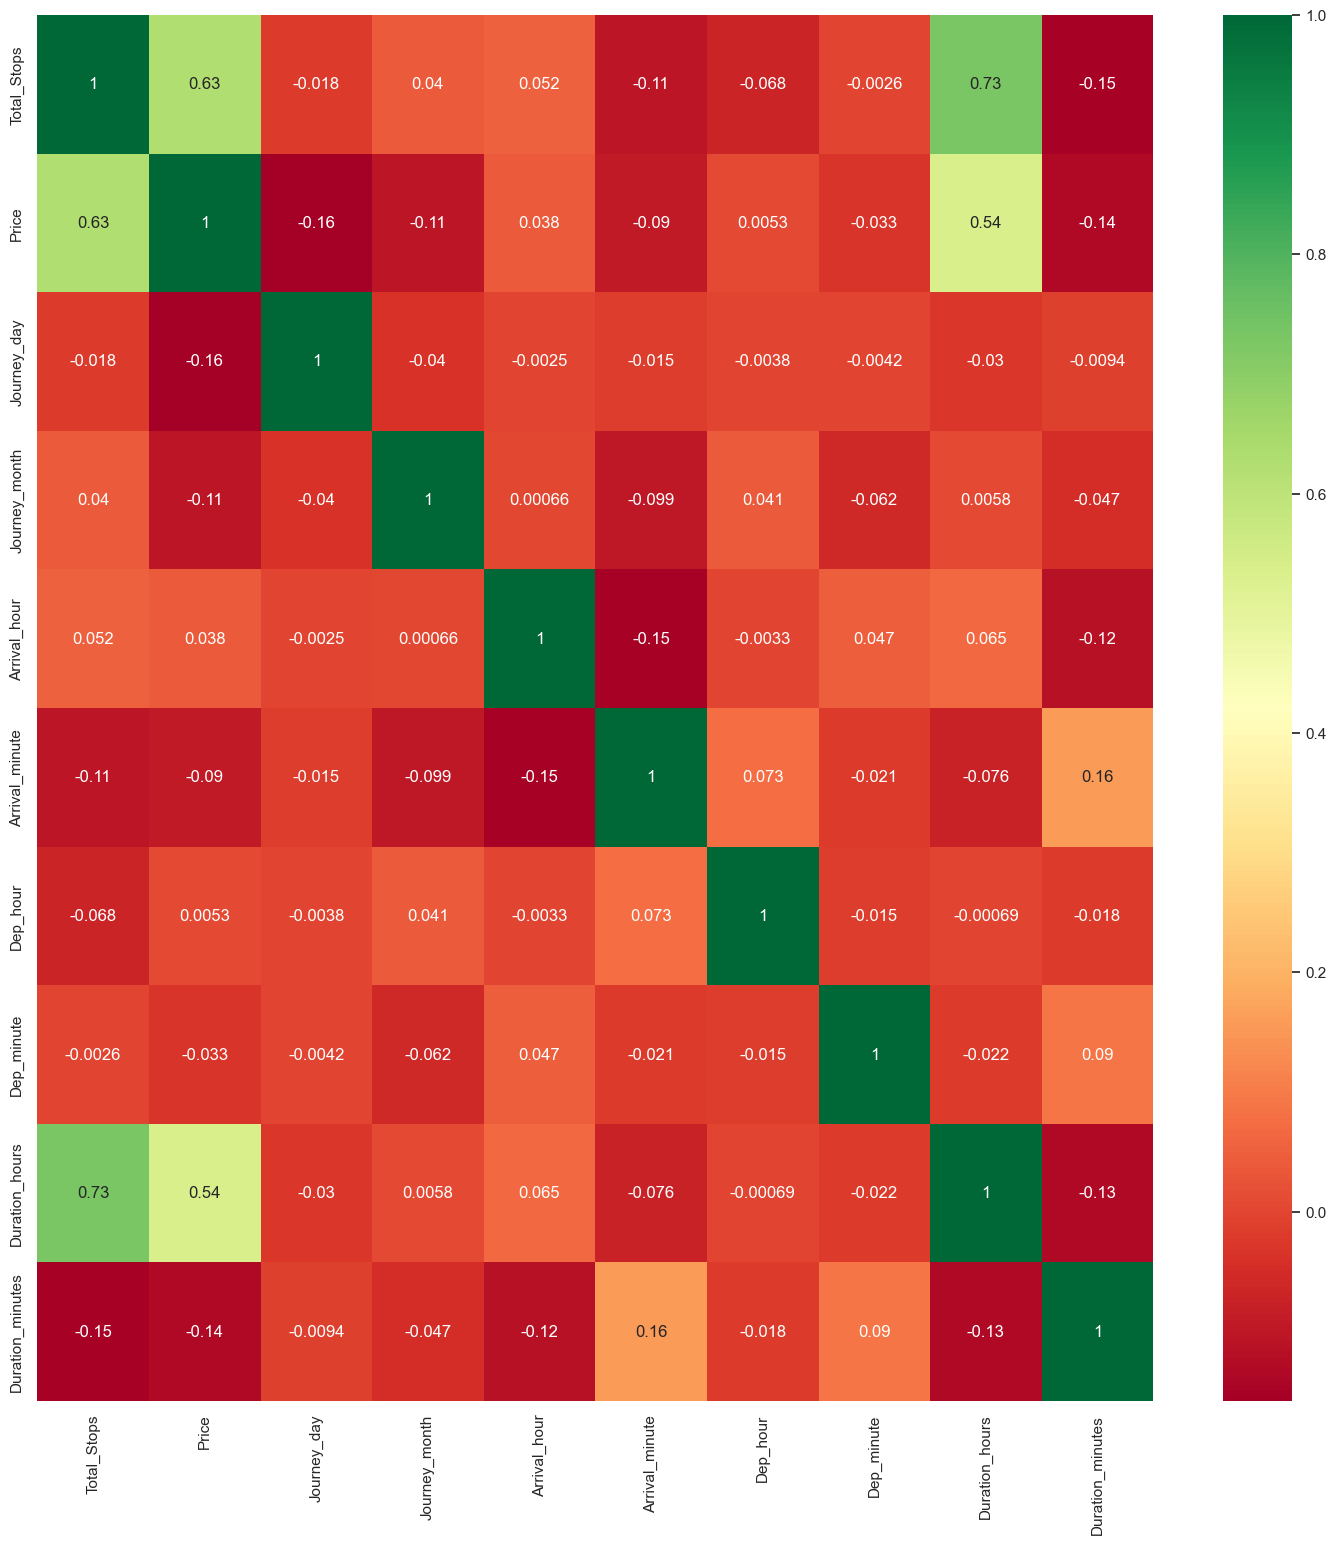

In [309]:
#find relation between independent and dependent attributes
#heatmap ************(learn it)

plt.figure(figsize=(18,18))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")
plt.show()

In [310]:
#extracting important features using 'ExtraTreesRegressor'

from sklearn.ensemble import ExtraTreesRegressor
select = ExtraTreesRegressor()
select.fit(X,Y)

ExtraTreesRegressor()

In [311]:
#selection_importances_
print(select.feature_importances_)

[2.50812207e-01 1.55359313e-01 5.95049804e-02 2.30258910e-02
 1.86402217e-02 2.39784282e-02 2.23834539e-02 1.27692358e-01
 1.66635121e-02 1.53565282e-02 1.81513767e-03 1.68561377e-02
 1.48068509e-01 2.17474968e-02 9.88281617e-04 3.16682493e-03
 1.26355492e-04 5.64019779e-03 8.94471237e-05 5.41154674e-04
 1.43964729e-02 3.82726639e-03 7.45917805e-03 1.43366172e-02
 1.51944822e-02 6.95582124e-03 5.18918812e-04 2.48548063e-02]


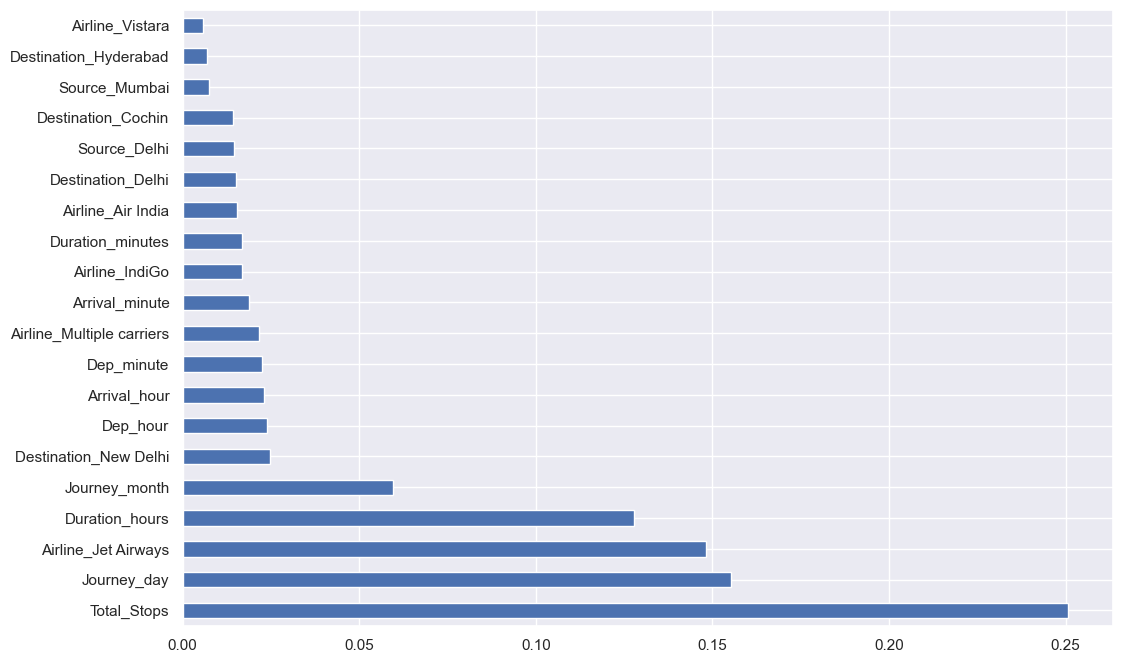

In [312]:
#plot graph of 'feature_importances_' for better visualization

plt.figure(figsize = (12,8))
fig_importances = pd.Series(select.feature_importances_, index=X.columns)
fig_importances.nlargest(20).plot(kind='barh')
plt.show()

## **4. Model Building**

In [313]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [314]:
#import 'train_test_split' 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

Linear Regression Score on Training set is 0.6105476986229462
Linear Regression Score on Test Set is 0.611401095790683
Accuracies [0.59298083 0.60193413 0.61311488 0.59365227 0.63490066]
Accuracy: 60.73 %
Standard Deviation: 1.56 %
Mean Absolute Error: 1922.8271909056548
Mean Squared Error: 7414900.0615305295
RMSE: 2723.0314103092032
The r2_score is 0.611401095790683


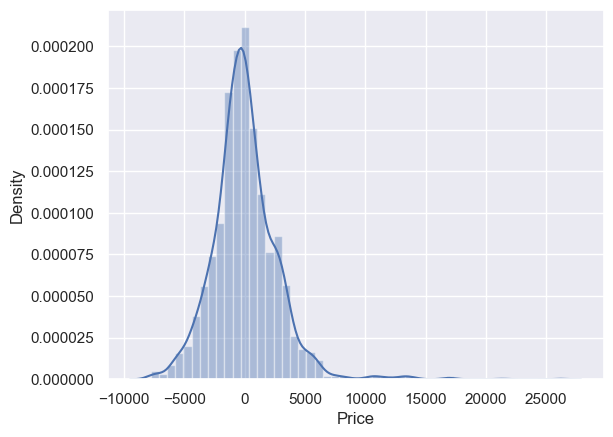

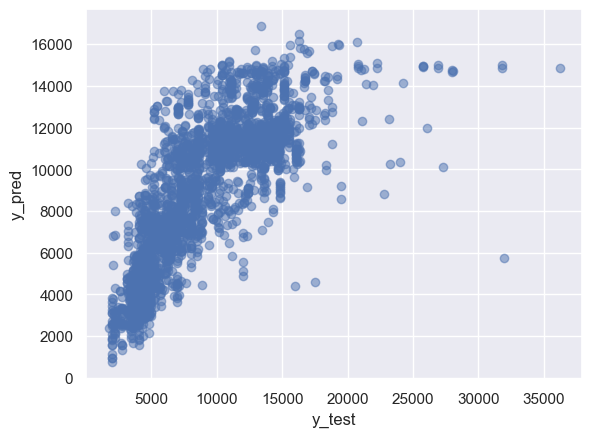

In [315]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)

print("Linear Regression Score on Training set is",lr.score(X_train, y_train))#Training Accuracy
print("Linear Regression Score on Test Set is",lr.score(X_test, y_test))#Testing Accuracy

accuracies = cross_val_score(lr, X_train, y_train, cv = 5)
print("Accuracies",accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

mae=mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:" , mae)

mse=mean_squared_error(y_test, y_pred)
print("Mean Squared Error:" , mse)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('The r2_score is', metrics.r2_score(y_test, y_pred))

sns.distplot(y_test-y_pred)
plt.show()

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

Elastic net Regression Score on Training set is 0.46759166759210413
Elastic net Regression Score on Test Set is 0.4775312097102199
Accuracies [0.45809654 0.470557   0.45971245 0.47646865 0.464197  ]
Accuracy: 46.58 %
Standard Deviation: 0.69 %
Mean Absolute Error: 2362.9383920092605
Mean Squared Error: 9969286.64312633
RMSE: 3157.4177175543828
The r2_score is 0.4775312097102199


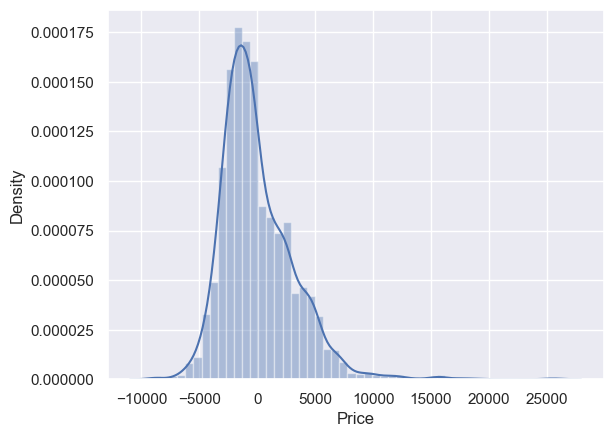

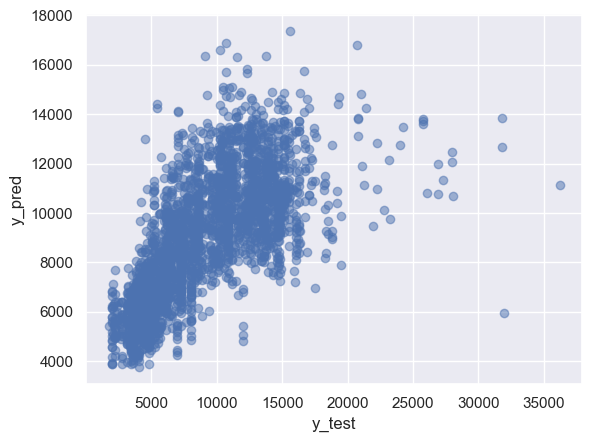

In [316]:
#Elastic net Regression
from sklearn.linear_model import ElasticNet
lr=ElasticNet()
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)

print("Elastic net Regression Score on Training set is",lr.score(X_train, y_train))#Training Accuracy
print("Elastic net Regression Score on Test Set is",lr.score(X_test, y_test))#Testing Accuracy

accuracies = cross_val_score(lr, X_train, y_train, cv = 5)
print("Accuracies",accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

mae=mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:" , mae)

mse=mean_squared_error(y_test, y_pred)
print("Mean Squared Error:" , mse)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('The r2_score is', metrics.r2_score(y_test, y_pred))

sns.distplot(y_test-y_pred)
plt.show()

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

Decision Tree Score on Training set is 0.9710209857803477
Decision Tree Score on Test Set is 0.6842166766212883
Accuracies [0.70026857 0.71231426 0.75493365 0.70875105 0.71972655]
Accuracy: 71.92 %
Standard Deviation: 1.89 %
Mean Absolute Error: 1409.5475516449885
Mean Squared Error: 6025497.64960193
RMSE: 2454.6889109624317
The r2_score is 0.6842166766212883


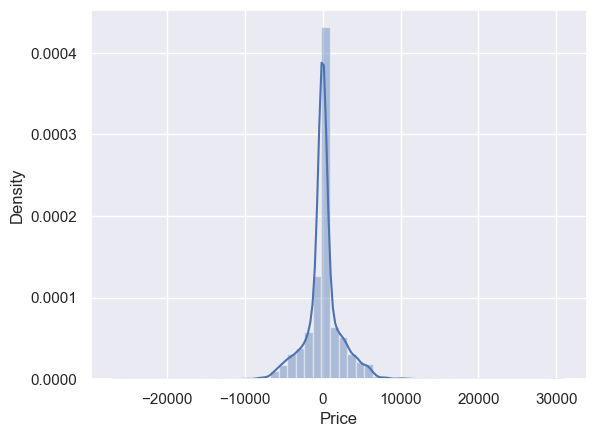

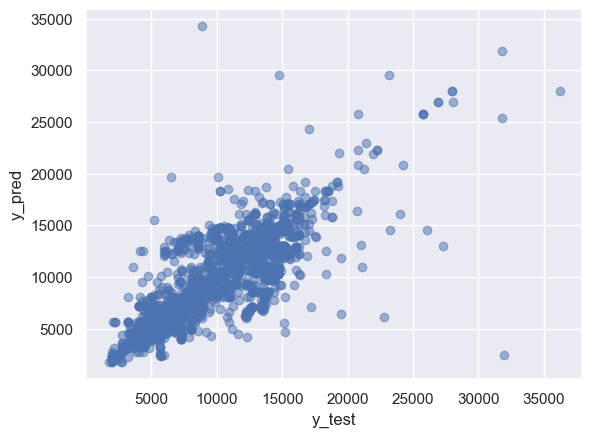

In [317]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(random_state = 0)
dt_reg.fit(X_train, y_train)
y_pred=dt_reg.predict(X_test)

print("Decision Tree Score on Training set is",dt_reg.score(X_train, y_train))#Training Accuracy
print("Decision Tree Score on Test Set is",dt_reg.score(X_test, y_test))#Testing Accuracy

accuracies = cross_val_score(dt_reg, X_train, y_train, cv = 5)
print("Accuracies",accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

mae=mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:" , mae)

mse=mean_squared_error(y_test, y_pred)
print("Mean Squared Error:" , mse)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('The r2_score is', metrics.r2_score(y_test, y_pred))

sns.distplot(y_test-y_pred)
plt.show()

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

Random Forest Score on Training set is 0.9011779384024098
Random Forest Score on Test Set is 0.8150745430034103
[0.83607896 0.83051856 0.83090009 0.82074949 0.84550497]
Accuracy: 83.28 %
Standard Deviation: 0.81 %
Mean Absolute Error: 1194.1163629671314
Mean Squared Error: 3528583.7597832787
RMSE: 1878.4524906910153
The r2_score is 0.8150745430034103


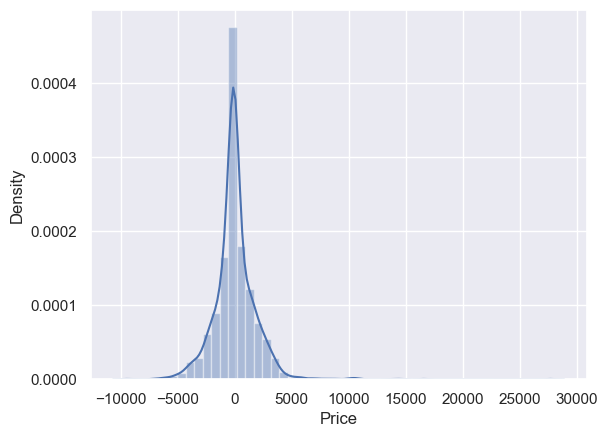

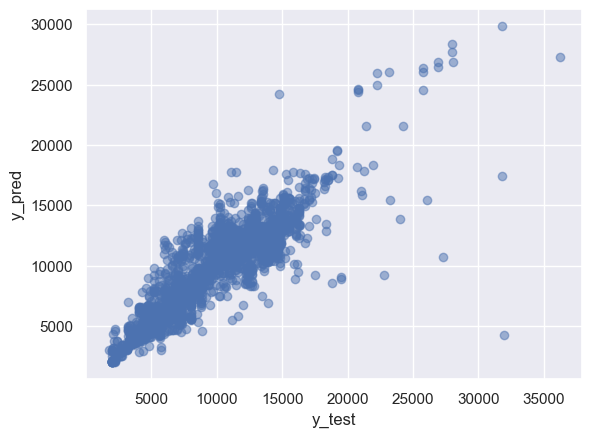

In [318]:
#Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=400,min_samples_split=15,min_samples_leaf=2,
max_features='auto', max_depth=30)
rf_reg.fit(X_train, y_train)
y_pred=rf_reg.predict(X_test)

print("Random Forest Score on Training set is",rf_reg.score(X_train, y_train))#Training Accuracy
print("Random Forest Score on Test Set is",rf_reg.score(X_test, y_test))#Testing Accuracy

accuracies = cross_val_score(rf_reg, X_train, y_train, cv = 5)
print(accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

mae=mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:" , mae)

mse=mean_squared_error(y_test, y_pred)
print("Mean Squared Error:" , mse)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('The r2_score is', metrics.r2_score(y_test, y_pred))

sns.distplot(y_test-y_pred)
plt.show()

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [319]:
X_train.columns

Index(['Total_Stops', 'Journey_day', 'Journey_month', 'Arrival_hour',
       'Arrival_minute', 'Dep_hour', 'Dep_minute', 'Duration_hours',
       'Duration_minutes', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

XGBoost Score on Training set is 0.8434271960976255
XGBoost Score on Test Set is 0.7991756390038491
[0.82482462 0.81142264 0.82197944 0.79781548 0.82586365]
Accuracy: 81.64 %
Standard Deviation: 1.06 %
Mean Absolute Error: 1357.6179525875918
Mean Squared Error: 3831952.5623394325
RMSE: 1957.5373718883204
The r2_score is 0.7991756390038491


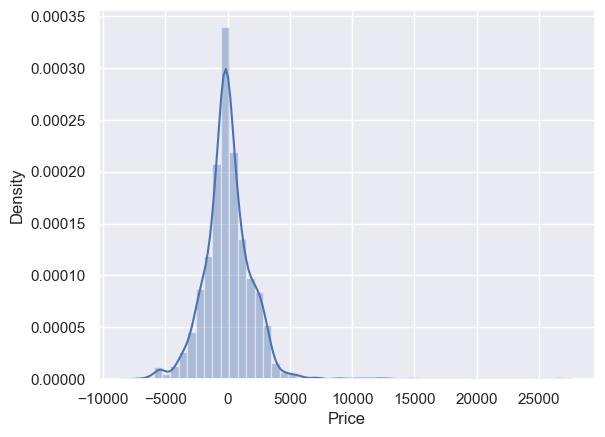

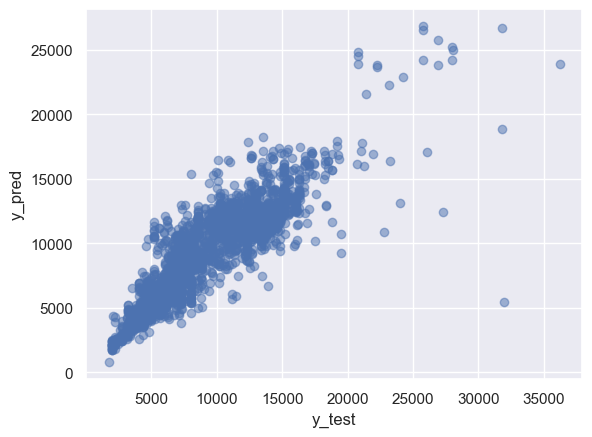

In [320]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create an XGBoost regressor
xgb_reg = XGBRegressor(n_estimators=400, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model on the training data
xgb_reg.fit(X_train, y_train)

# Predict on the test data
y_pred = xgb_reg.predict(X_test)

# Calculate and print various regression metrics
print("XGBoost Score on Training set is", xgb_reg.score(X_train, y_train))  # Training Accuracy
print("XGBoost Score on Test Set is", xgb_reg.score(X_test, y_test))  # Testing Accuracy

accuracies = cross_val_score(xgb_reg, X_train, y_train, cv=5)
print(accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean() * 100))
print("Standard Deviation: {:.2f} %".format(accuracies.std() * 100))

mae = mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:", mae)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('The r2_score is', r2_score(y_test, y_pred))

sns.distplot(y_test - y_pred)
plt.show()

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()


Gradient Boosting Score on Training set is 0.8468251167785208
Gradient Boosting Score on Test Set is 0.7994187200472506
[0.82669328 0.8116641  0.8210877  0.80015634 0.82917374]
Accuracy: 81.78 %
Standard Deviation: 1.07 %
Mean Absolute Error: 1358.2491908190939
Mean Squared Error: 3827314.3051952412
RMSE: 1956.3522957778441
The r2_score is 0.7994187200472506


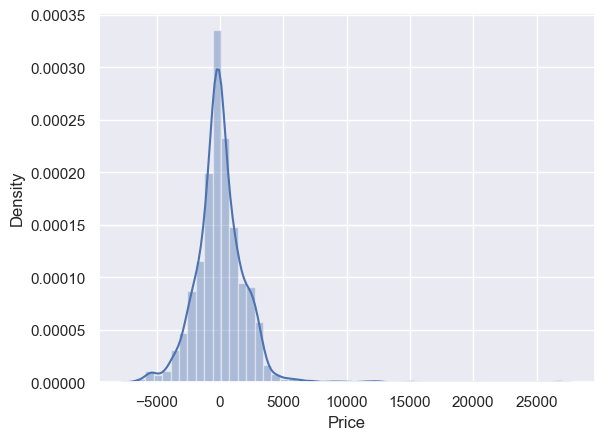

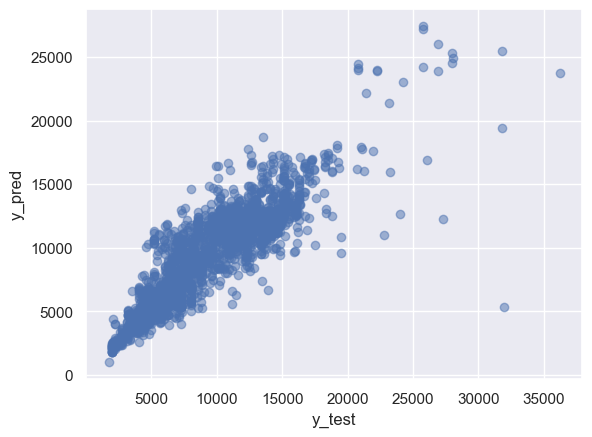

In [321]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create a Gradient Boosting regressor
gb_reg = GradientBoostingRegressor(n_estimators=400, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model on the training data
gb_reg.fit(X_train, y_train)

# Predict on the test data
y_pred = gb_reg.predict(X_test)

# Calculate and print various regression metrics
print("Gradient Boosting Score on Training set is", gb_reg.score(X_train, y_train))  # Training Accuracy
print("Gradient Boosting Score on Test Set is", gb_reg.score(X_test, y_test))  # Testing Accuracy

accuracies = cross_val_score(gb_reg, X_train, y_train, cv=5)
print(accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean() * 100))
print("Standard Deviation: {:.2f} %".format(accuracies.std() * 100))

mae = mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:", mae)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

print('RMSE:', np.sqrt(mse))

print('The r2_score is', r2_score(y_test, y_pred))

sns.distplot(y_test - y_pred)
plt.show()

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()


# Hyperparameter Tuning for Random Forest

1. There are two ways of doing it:
 a) RandomizedSearchCV --> Fast    
 b) GridSearchCV
2. assign hyperparameters in form of dictionery
3. Fit the model
4. Check best paramters and best score

In [322]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [323]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [324]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
rf_random = RandomizedSearchCV(estimator = rf_reg, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=4, n_jobs = 1)

In [325]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=700; total time=  28.2s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=700; total time=  27.7s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=700; total time=  27.8s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=700; total time=  27.7s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=700; total time=  27.7s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=700; total time=  15.8s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=700; total time=  15.9s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estima

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_depth=30,
                                                   max_features='auto',
                                                   min_samples_leaf=2,
                                                   min_samples_split=15,
                                                   n_estimators=400),
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=4, scoring='neg_mean_squared_error', verbose=2)

In [326]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 30}

In [327]:
prediction = rf_random.predict(X_test)

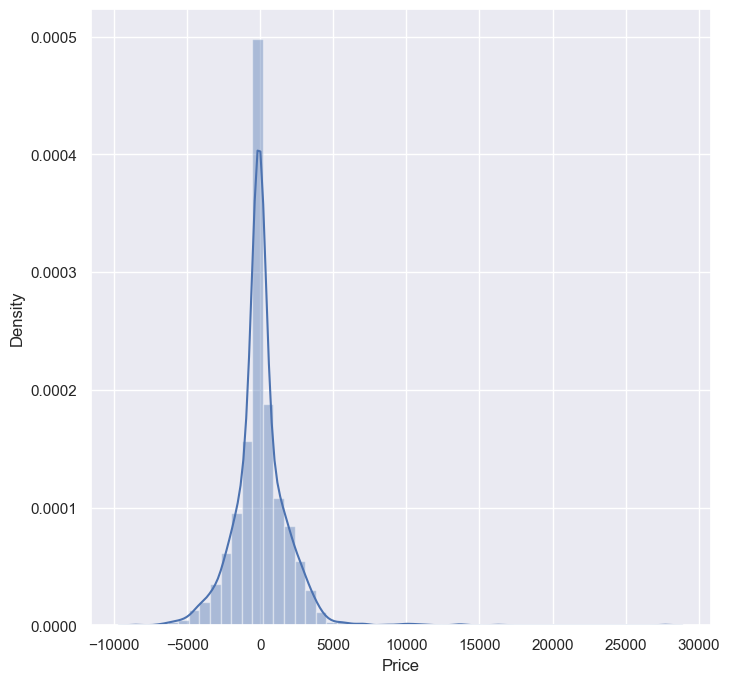

In [328]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

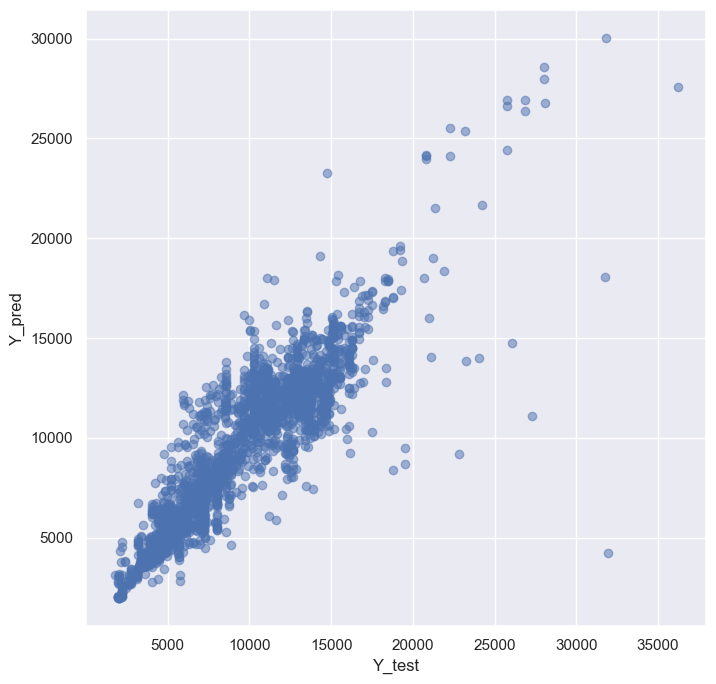

In [329]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("Y_test")
plt.ylabel("Y_pred")
plt.show()

In [330]:
# calculate r2_score
r2 = metrics.r2_score(y_test, prediction)
print(r2)

0.8155481086751306


In [331]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1179.2081162709198
MSE: 3519547.5991293476
RMSE: 1876.0457348181435


# Save model to reuse it again

In [332]:
import pickle
# open a file, where you ant to store the data
file = open('RF_reg_1.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

In [333]:
model = open('RF_reg_1.pkl','rb')
forest = pickle.load(model)

In [334]:
Y_prediction = forest.predict(X_test)

In [335]:
metrics.r2_score(y_test, Y_prediction)
#Conclusion:--> r2-value is increased

0.8155481086751306